In [50]:
import pyomo.environ as pyo

In [51]:
results = []
solver = pyo.SolverFactory('ipopt')

for init_x in range(-10, 11):  # -10부터 10까지 정수 반복
    model = pyo.ConcreteModel()
    model.x = pyo.Var(domain=pyo.Reals, bounds=(-10,10))
    model.x.value = init_x  # x의 초기값을 현재 반복값으로 지정
    model.obj = pyo.Objective(expr=pyo.sin(3*model.x) + 0.1*model.x**2, sense=pyo.minimize)
    
    result = solver.solve(model, tee=False)
    x_val = round(pyo.value(model.x), 4)
    obj_val = round(pyo.value(model.obj), 4)
    results.append((init_x, x_val, obj_val))

print("초기값 | 최적 x | 목적함수 값")
for init_x, x_val, obj_val in results:
    print(f"{init_x:>6} | {x_val:>6} | {obj_val:>10}")

초기값 | 최적 x | 목적함수 값
   -10 | -0.5122 |    -0.9732
    -9 | -8.6951 |     6.7456
    -8 | -6.6536 |     3.5308
    -7 | -6.6536 |     3.5308
    -6 | -6.6536 |     3.5308
    -5 | -4.6083 |      1.172
    -4 | -4.6083 |      1.172
    -3 | -2.5608 |    -0.3295
    -2 | -2.5608 |    -0.3295
    -1 | -0.5122 |    -0.9732
     0 | -0.5122 |    -0.9732
     1 | 1.5366 |    -0.7586
     2 | 1.5366 |    -0.7586
     3 | 3.5848 |      0.314
     4 | 3.5848 |      0.314
     5 | 5.6313 |     2.2443
     6 | 5.6313 |     2.2443
     7 | 7.6749 |     5.0313
     8 | 7.6749 |     5.0313
     9 | 1.5366 |    -0.7586
    10 | 9.7136 |     8.6734


/tmp/ipykernel_3511/283307548.py:43: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3511/283307548.py:43: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3511/283307548.py:43: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3511/283307548.py:43: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3511/283307548.py:43: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3511/283307548.py:43: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3511/283307548.py:43: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


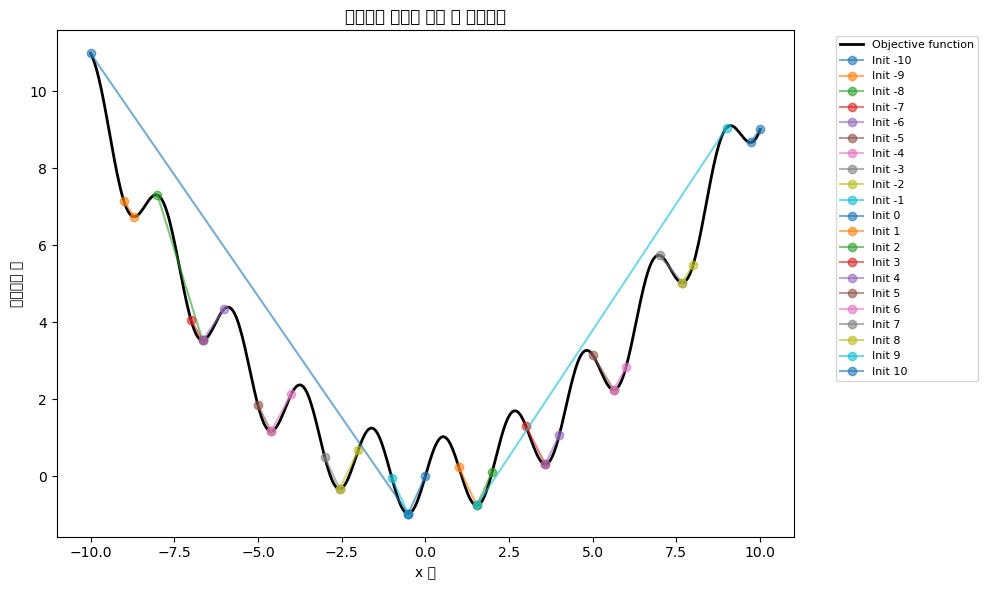

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# 각 초기값별로 최적화가 어떻게 진행되는지 경로를 저장할 리스트
paths = []

solver = pyo.SolverFactory('ipopt')

for init_x in range(-10, 11):
    model = pyo.ConcreteModel()
    model.x = pyo.Var(domain=pyo.Reals, bounds=(-10,10))
    model.x.value = init_x
    model.obj = pyo.Objective(expr=pyo.sin(3*model.x) + 0.1*model.x**2, sense=pyo.minimize)
    
    # 경로를 저장할 리스트
    x_path = []
    obj_path = []
    
    # IPOPT는 직접적으로 callback을 지원하지 않으므로, 여기서는 여러 step을 볼 수 없음
    # 하지만, 최적화 전후의 값을 시각화할 수 있음
    x_path.append(init_x)
    obj_path.append(pyo.value(model.obj))
    result = solver.solve(model, tee=False)
    x_path.append(pyo.value(model.x))
    obj_path.append(pyo.value(model.obj))
    paths.append((init_x, x_path, obj_path))

# 목적함수 그래프 그리기
x_grid = np.linspace(-10, 10, 500)
obj_grid = np.sin(3*x_grid) + 0.1*x_grid**2

plt.figure(figsize=(10,6))
plt.plot(x_grid, obj_grid, color='black', linewidth=2, label='Objective function')

# 각 초기값별 최적화 경로 그리기
for init_x, x_path, obj_path in paths:
    plt.plot(x_path, obj_path, marker='o', label=f'Init {init_x}', alpha=0.6)

plt.xlabel('x 값')
plt.ylabel('목적함수 값')
plt.title('초기값별 최적화 경로 및 목적함수')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()


In [52]:
results = []
solver = pyo.SolverFactory('ipopt')

# x와 y의 초기값을 -6부터 6까지 정수로 반복
for init_x in range(-6, 7):
    for init_y in range(-6, 7):
        model = pyo.ConcreteModel()
        model.x = pyo.Var(domain=pyo.Reals, bounds=(-6,6))
        model.y = pyo.Var(domain=pyo.Reals, bounds=(-6,6))
        model.x.value = init_x
        model.y.value = init_y
        model.obj = pyo.Objective(expr=(model.x**2 + model.y - 11)**2 + (model.x + model.y**2 - 7)**2, sense=pyo.minimize)
        
        result = solver.solve(model, tee=False)
        x_val = round(pyo.value(model.x), 4)
        y_val = round(pyo.value(model.y), 4)
        obj_val = round(pyo.value(model.obj), 4)
        results.append((init_x, init_y, x_val, y_val, obj_val))

print("초기 x | 초기 y | 최적 x | 최적 y | 목적함수 값")
for init_x, init_y, x_val, y_val, obj_val in results:
    print(f"{init_x:>6} | {init_y:>6} | {x_val:>6} | {y_val:>6} | {obj_val:>10}")

초기 x | 초기 y | 최적 x | 최적 y | 목적함수 값
    -6 |     -6 | -3.7793 | -3.2832 |        0.0
    -6 |     -5 | -3.7793 | -3.2832 |        0.0
    -6 |     -4 | -3.7793 | -3.2832 |        0.0
    -6 |     -3 | -3.7793 | -3.2832 |        0.0
    -6 |     -2 | -3.7793 | -3.2832 |        0.0
    -6 |     -1 | -3.7793 | -3.2832 |        0.0
    -6 |      0 | -3.7793 | -3.2832 |        0.0
    -6 |      1 | -2.8051 | 3.1313 |        0.0
    -6 |      2 | -2.8051 | 3.1313 |        0.0
    -6 |      3 | -2.8051 | 3.1313 |        0.0
    -6 |      4 | -2.8051 | 3.1313 |        0.0
    -6 |      5 | -2.8051 | 3.1313 |        0.0
    -6 |      6 | -2.8051 | 3.1313 |        0.0
    -5 |     -6 | -3.7793 | -3.2832 |        0.0
    -5 |     -5 | -3.7793 | -3.2832 |        0.0
    -5 |     -4 | -3.7793 | -3.2832 |        0.0
    -5 |     -3 | -3.7793 | -3.2832 |        0.0
    -5 |     -2 | -3.7793 | -3.2832 |        0.0
    -5 |     -1 | -3.7793 | -3.2832 |        0.0
    -5 |      0 | -3.7793 | -3.2832 |   

In [53]:
import math

results = []
solver = pyo.SolverFactory('ipopt')

# x와 y의 초기값을 -5부터 5까지 정수로 반복
for init_x in range(-5, 6):
    for init_y in range(-5, 6):
        model = pyo.ConcreteModel()
        model.x = pyo.Var(domain=pyo.Reals, bounds=(-5,5))
        model.y = pyo.Var(domain=pyo.Reals, bounds=(-5,5))
        model.x.value = init_x
        model.y.value = init_y
        model.obj = pyo.Objective(
            expr=20 + (model.x**2 - 10*pyo.cos(2*math.pi*model.x)) + (model.y**2 - 10*pyo.cos(2*math.pi*model.y)),
            sense=pyo.minimize
        )
        result = solver.solve(model, tee=False)
        x_val = round(pyo.value(model.x), 4)
        y_val = round(pyo.value(model.y), 4)
        obj_val = round(pyo.value(model.obj), 4)
        results.append((init_x, init_y, x_val, y_val, obj_val))

print("초기 x | 초기 y | 최적 x | 최적 y | 목적함수 값")
for init_x, init_y, x_val, y_val, obj_val in results:
    print(f"{init_x:>6} | {init_y:>6} | {x_val:>6} | {y_val:>6} | {obj_val:>10}")

초기 x | 초기 y | 최적 x | 최적 y | 목적함수 값
    -5 |     -5 | -4.9747 | -4.9747 |    49.7474
    -5 |     -4 | -4.9747 | -3.9798 |     40.793
    -5 |     -3 | -4.9747 | -2.9849 |    33.8283
    -5 |     -2 | -4.9747 | -1.9899 |    28.8536
    -5 |     -1 | -4.9747 | -0.995 |    25.8687
    -5 |      0 | -4.9747 |    0.0 |    24.8737
    -5 |      1 | -4.9747 |  0.995 |    25.8687
    -5 |      2 | -4.9747 | 1.9899 |    28.8536
    -5 |      3 | -4.9747 | 2.9849 |    33.8283
    -5 |      4 | -4.9747 | 3.9798 |     40.793
    -5 |      5 | -4.9747 | 4.9747 |    49.7474
    -4 |     -5 | -3.9798 | -4.9747 |     40.793
    -4 |     -4 | -3.9798 | -3.9798 |    31.8385
    -4 |     -3 | -3.9798 | -2.9849 |    24.8738
    -4 |     -2 | -3.9798 | -1.9899 |    19.8991
    -4 |     -1 | -3.9798 | -0.995 |    16.9142
    -4 |      0 | -3.9798 |    0.0 |    15.9192
    -4 |      1 | -3.9798 |  0.995 |    16.9142
    -4 |      2 | -3.9798 | 1.9899 |    19.8991
    -4 |      3 | -3.9798 | 2.9849 |    24.87

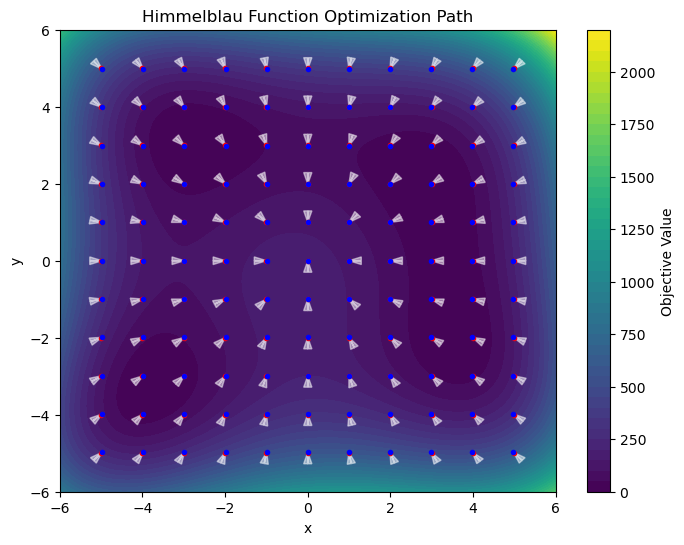

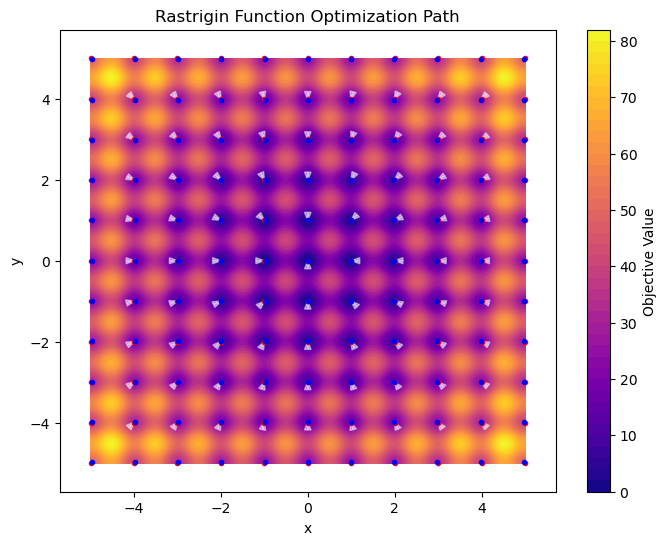

세 번째 문제의 결과 리스트(results3)가 정의되어 있지 않습니다. 실제 데이터로 대체하세요.


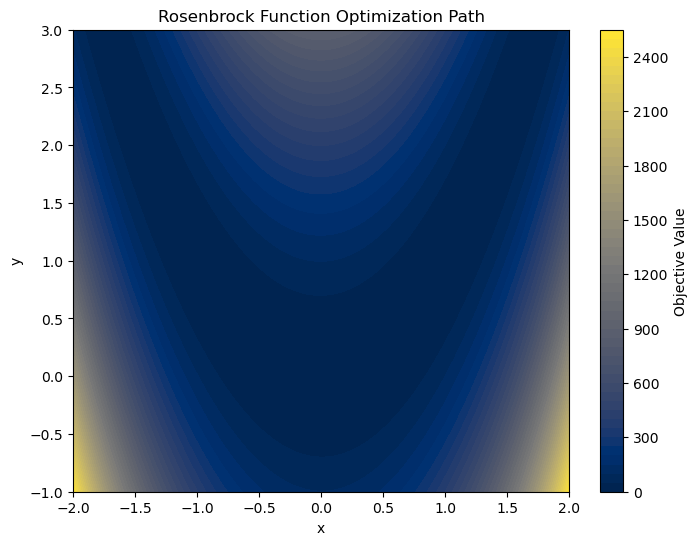

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 첫 번째 문제: Himmelblau 함수
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# 두 번째 문제: Rastrigin 함수
def rastrigin(x, y):
    return 20 + (x**2 - 10*np.cos(2*np.pi*x)) + (y**2 - 10*np.cos(2*np.pi*y))

# 세 번째 문제: Rosenbrock 함수 (예시)
def rosenbrock(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

# 첫 번째 문제 결과 시각화 (Himmelblau)
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Objective Value')
for init_x, init_y, x_val, y_val, obj_val in results:
    plt.plot(init_x, init_y, 'ro', markersize=3)  # 초기값
    plt.plot(x_val, y_val, 'bo', markersize=3)    # 최적값
    plt.arrow(init_x, init_y, x_val-init_x, y_val-init_y, 
              head_width=0.2, head_length=0.3, fc='w', ec='w', alpha=0.5, length_includes_head=True)
plt.title('Himmelblau Function Optimization Path')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 두 번째 문제 결과 시각화 (Rastrigin)
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, levels=50, cmap='plasma')
plt.colorbar(label='Objective Value')
for init_x, init_y, x_val, y_val, obj_val in results:
    plt.plot(init_x, init_y, 'ro', markersize=3)
    plt.plot(x_val, y_val, 'bo', markersize=3)
    plt.arrow(init_x, init_y, x_val-init_x, y_val-init_y, 
              head_width=0.15, head_length=0.2, fc='w', ec='w', alpha=0.5, length_includes_head=True)
plt.title('Rastrigin Function Optimization Path')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 세 번째 문제 결과 시각화 (Rosenbrock, 예시)
# 실제로 세 번째 문제의 results3 리스트가 있다면 그걸 사용하세요.
# 아래는 예시용 코드입니다.
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, levels=50, cmap='cividis')
plt.colorbar(label='Objective Value')

# results3가 있다고 가정 (예시 데이터)
# results3 = [(init_x, init_y, x_val, y_val, obj_val), ...]
# 실제 데이터로 대체하세요.
try:
    for init_x, init_y, x_val, y_val, obj_val in results3:
        plt.plot(init_x, init_y, 'ro', markersize=3)
        plt.plot(x_val, y_val, 'bo', markersize=3)
        plt.arrow(init_x, init_y, x_val-init_x, y_val-init_y, 
                  head_width=0.08, head_length=0.1, fc='w', ec='w', alpha=0.5, length_includes_head=True)
except NameError:
    print("세 번째 문제의 결과 리스트(results3)가 정의되어 있지 않습니다. 실제 데이터로 대체하세요.")

plt.title('Rosenbrock Function Optimization Path')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

